### Multivariate Linear Regression Task
- 구매자의 연수입(Annual Salary)과 순자산(자산 - 부채, Net Worth), 신용카드 부채(Credit Card Debt)를 통해 다변량 회귀 분석 진행

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/car_purchasing.csv')
c_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
pre_c_df = c_df.iloc[:, -6:]
pre_c_df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [11]:
pre_c_df.corr()['Car Purchase Amount'].sort_values(ascending=False)[1:]

Age                 0.633273
Annual Salary       0.617862
Net Worth           0.488580
Credit Card Debt    0.028882
Gender             -0.066408
Name: Car Purchase Amount, dtype: float64

In [13]:
pre_c_df = pre_c_df.loc[:, ['Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']]
pre_c_df

,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,62812.09301,11609.380910,238961.2505,35321.45877
1,66646.89292,9572.957136,530973.9078,45115.52566
2,53798.55112,11160.355060,638467.1773,42925.70921
3,79370.03798,14426.164850,548599.0524,67422.36313
4,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...
495,71942.40291,6995.902524,541670.1016,48901.44342
496,56039.49793,12301.456790,360419.0988,31491.41457
497,68888.77805,10611.606860,764531.3203,64147.28888
498,49811.99062,14013.034510,337826.6382,45442.15353


array([[<Axes: title={'center': 'Annual Salary'}>,
        <Axes: title={'center': 'Credit Card Debt'}>],
       [<Axes: title={'center': 'Net Worth'}>,
        <Axes: title={'center': 'Car Purchase Amount'}>]], dtype=object)

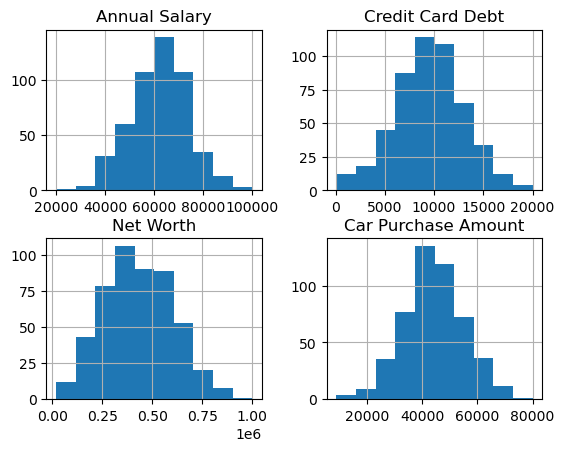

In [14]:
pre_c_df.hist()

In [28]:
import numpy as np
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-12)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()))

1000/10000: W1: 0.3670, W2: 0.0487, W3: 0.0458, b: 0.0000, loss: 58160476.0000
2000/10000: W1: 0.4668, W2: 0.0600, W3: 0.0331, b: 0.0000, loss: 46555320.0000
3000/10000: W1: 0.4949, W2: 0.0615, W3: 0.0296, b: 0.0000, loss: 45642292.0000
4000/10000: W1: 0.5030, W2: 0.0603, W3: 0.0286, b: 0.0000, loss: 45565804.0000
5000/10000: W1: 0.5055, W2: 0.0583, W3: 0.0283, b: 0.0000, loss: 45555040.0000
6000/10000: W1: 0.5064, W2: 0.0562, W3: 0.0283, b: 0.0000, loss: 45549672.0000
7000/10000: W1: 0.5069, W2: 0.0541, W3: 0.0283, b: 0.0000, loss: 45544980.0000
8000/10000: W1: 0.5072, W2: 0.0520, W3: 0.0283, b: 0.0000, loss: 45540576.0000
9000/10000: W1: 0.5075, W2: 0.0500, W3: 0.0283, b: 0.0000, loss: 45536416.0000
10000/10000: W1: 0.5078, W2: 0.0480, W3: 0.0283, b: 0.0000, loss: 45532488.0000


In [30]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn import Linear
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = Linear(3, 1)

optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

 100/10000: W1: -0.3234, W2: 0.1609, W3: 0.1295, b: -0.0299, loss: 469670592.0000
 200/10000: W1: -0.2276, W2: 0.1734, W3: 0.1173, b: -0.0299, loss: 374515712.0000
 300/10000: W1: -0.1432, W2: 0.1843, W3: 0.1066, b: -0.0299, loss: 300764640.0000
 400/10000: W1: -0.0689, W2: 0.1938, W3: 0.0972, b: -0.0299, loss: 243602848.0000
 500/10000: W1: -0.0035, W2: 0.2021, W3: 0.0889, b: -0.0299, loss: 199298352.0000
 600/10000: W1: 0.0541, W2: 0.2093, W3: 0.0816, b: -0.0299, loss: 164958848.0000
 700/10000: W1: 0.1048, W2: 0.2155, W3: 0.0752, b: -0.0299, loss: 138342688.0000
 800/10000: W1: 0.1495, W2: 0.2209, W3: 0.0695, b: -0.0299, loss: 117712448.0000
 900/10000: W1: 0.1888, W2: 0.2255, W3: 0.0645, b: -0.0299, loss: 101721632.0000
1000/10000: W1: 0.2234, W2: 0.2295, W3: 0.0602, b: -0.0299, loss: 89326496.0000
1100/10000: W1: 0.2540, W2: 0.2329, W3: 0.0563, b: -0.0299, loss: 79718240.0000
1200/10000: W1: 0.2808, W2: 0.2358, W3: 0.0529, b: -0.0299, loss: 72269960.0000
1300/10000: W1: 0.3045, W2

In [32]:
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self, input):
        super().__init__()
        self.linear = Linear(input, 1)

    def forward(self, x):
        return self.linear(x)

In [33]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel(3)

optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 10000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

1000/10000: W1: 0.2234, W2: 0.2295, W3: 0.0602, b: -0.0299, loss: 89326496.0000
2000/10000: W1: 0.4076, W2: 0.2470, W3: 0.0369, b: -0.0299, loss: 49917264.0000
3000/10000: W1: 0.4599, W2: 0.2463, W3: 0.0304, b: -0.0299, loss: 46778348.0000
4000/10000: W1: 0.4753, W2: 0.2407, W3: 0.0286, b: -0.0299, loss: 46479328.0000
5000/10000: W1: 0.4803, W2: 0.2339, W3: 0.0281, b: -0.0299, loss: 46405388.0000
6000/10000: W1: 0.4824, W2: 0.2269, W3: 0.0280, b: -0.0299, loss: 46351848.0000
7000/10000: W1: 0.4837, W2: 0.2200, W3: 0.0280, b: -0.0299, loss: 46302556.0000
8000/10000: W1: 0.4847, W2: 0.2133, W3: 0.0280, b: -0.0299, loss: 46256112.0000
9000/10000: W1: 0.4857, W2: 0.2068, W3: 0.0280, b: -0.0299, loss: 46212244.0000
10000/10000: W1: 0.4866, W2: 0.2004, W3: 0.0280, b: -0.0299, loss: 46170812.0000


In [35]:
import numpy as np

H = l_r(X_test)
loss = mse_loss(y_test, H)

print(loss.item())
print(np.sqrt(loss.item()))

45212032.0
6723.989292079516


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)


In [ ]:
# print('W: {:.4f}, b: {:.4f}, loss: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

In [44]:
for i, w in enumerate(l_r.coef_):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
print('b: {:.4f}, MSLE: {:.4f}, MSE: {:.4f}'\
      .format(l_r.intercept_, mean_squared_log_error(y_test, prediction), mean_squared_error(y_test, prediction)))

W1: 0.5646, W2: 0.0583, W3: 0.0300, b: -4533.4234, MSLE: 0.0362, MSE: 44871459.9118


In [47]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [50]:
for i, w in enumerate(l_r.coef_):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
print('b: {:.4f}'\
      .format(l_r.intercept_))
get_evaluation(y_test, prediction)

W1: 0.5646, W2: 0.0583, W3: 0.0300, b: -4533.4234
MSE: 44871459.9118, RMSE: 6698.6163, MSLE: 0.0362, RMSLE: 0.1902
